In [4]:
from matplotlib import pyplot as plt
import numpy as np
import time
import sys
import pandas as pd
import seaborn as sns

sys.path.append("../PycharmProjects/pythonProject")
import NetworkClass
from imp import reload
reload(NetworkClass)
from NetworkClass import Network

In [5]:
#Parameters (see class for documentation)

length = 40000

dim = (1,10,10)
input_num = 10
Clusters = 2
dt = 0.05

V_syn={(1, 1): 60, (1, 0): -70, (0, 1): 60, (0, 0): -70} # Synapses stregnth (EE,EI,IE,II)
#connect_const = {(1, 1): 0.4, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} # Probability of connection between two neurons within class (EE,EI,IE,II)
connect_const = {(1, 1): 0.6, (1, 0): 0.4, (0, 1): 0.3,(0, 0): 0.1} #(EE,EI,IE,II)
cluster_pr = 0.03 # Connection probability between neurons in cluster 1 and 2 (used to be 0.1)

net = Network(dim=dim,model='SFA',clusters=2,lamb=2.2,inh_frac=0.2,dt=dt,R=0.2,tau=40,Vreset=5,Vr=-70,Vth=-40,alpha=0.05,tauN=80,gk=20,Vk=-88,J=4,tauRise=.8,tauDec=5.8,V_syn=V_syn,tau_psc=(6,3),connect_const=connect_const, input_num=input_num,cluster_pr=cluster_pr)


input_spikes=net.generate_spiketrain(length*dt,dt,20/1000,input_num,False)

net.run_model(input_spikes,input_type=1)


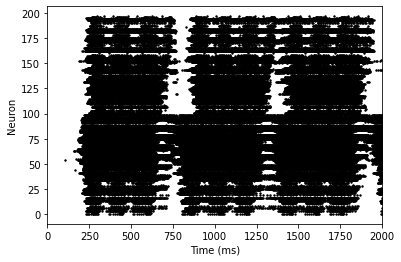

In [17]:
fig=net.plot_spikes();

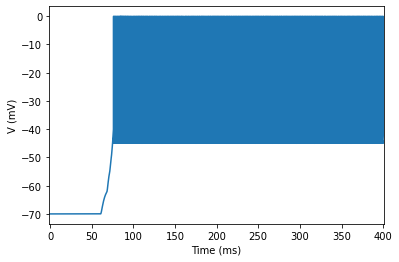

In [8]:
net.plot_neuron(51)


In [ ]:
#print(net.connections)
net.plot_network();

In [7]:
#Calculate LFP

rows = np.arange(0,10)
cols = np.arange(0,20)

times = np.arange(15000,35000,10)
phis = np.zeros((rows.shape[0]*cols.shape[0],times.shape[0]))

size(phis)

In [ ]:
count=0
for i in rows:

    for j in cols:
        print(j+i*20)
        z, x, y = net.get_pos(j+i*20)
        r = net.get_r(x, y)
        for k,t in enumerate(net.EPSC_seq[j+i*20][times]):
            phis[count,k] = net.get_phi(net.EPSC_seq,r,times[k],0.003,net.dim)
        count+=1

In [30]:
z, x, y = np.array(np.unravel_index(1, net.dim))
x.size

1

In [6]:
pos1=np.int64(0)
pos2=np.int64(1)
r1=net.get_r(pos1,pos2)
r2=net.get_r(pos2,pos1)
dist=net.calc_dist(r1,r2)
print(dist)
print(np.sqrt(2))

[1.41421356]
1.4142135623730951


In [20]:
saveDir='/media/sil2/Literature/Projects/corplex/progress reports/meetings/next/Simulation/'
np.savetxt(saveDir+'Spikes.txt',net.spikes_seq)
np.savetxt(saveDir+'lfp.txt',phis)
